# Optical Neural Network: Design and Layout of NxN Switching Matrix

This notebook provides a detailed guide for designing and implementing the optical switch matrix architecture, a crucial component in optical neural networks (ONNs). We'll explore the optimal layout patterns for NxN optical switches, addressing key considerations like signal routing, crosstalk minimization, and insertion loss optimization.

In [1]:
import gdsfactory as gf
from onn.optics.interferometer import random_unitary, square_decomposition

### Defining the unit component:

A 2x2 Mach-Zehnder interferometer.

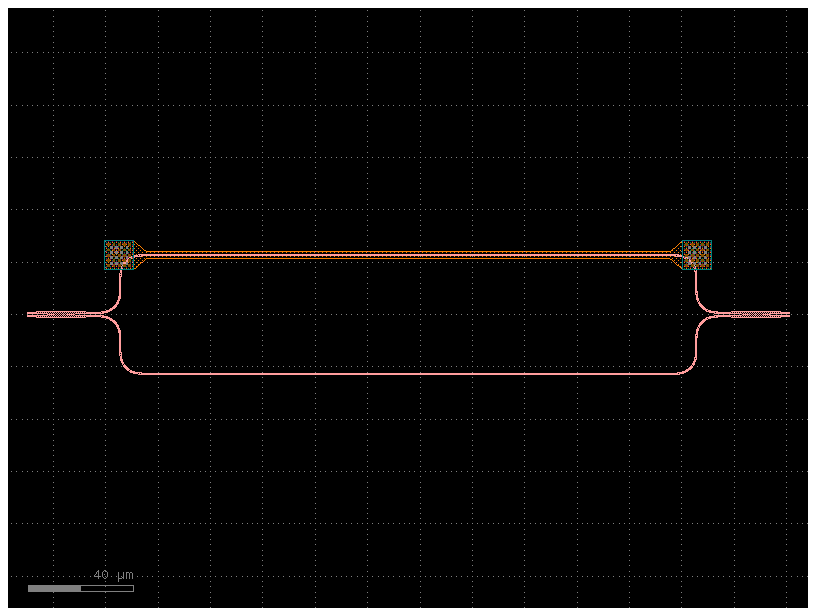

In [2]:
tunable_BS = gf.components.mzi2x2_2x2_phase_shifter(
    delta_length=0,
    length_y=2,
    length_x=200,
    straight_x_top="straight_heater_metal",
    splitter="mmi2x2",
    combiner="mmi2x2",
    cross_section=gf.cross_section.strip,
).copy()
# tunable_BS.draw_ports()
tunable_BS.plot()

### Array of input/output couplers

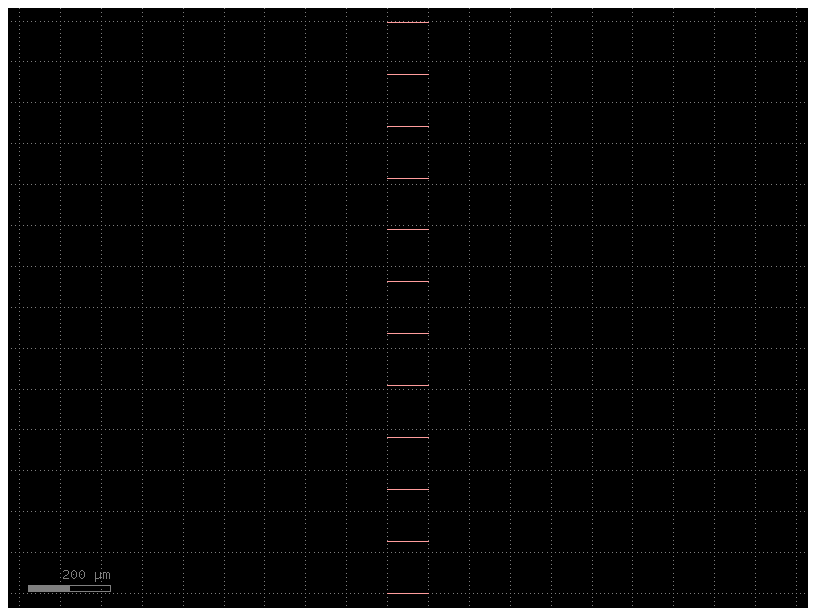

In [3]:
from functools import partial

coupler_array = partial(
    gf.components.edge_coupler_array,
    edge_coupler="edge_coupler_silicon",
    pitch=127,
    text="",
)

input_coupler_array = coupler_array(n=12, x_reflection=True)
input_coupler_array.plot()

### Create interferometer


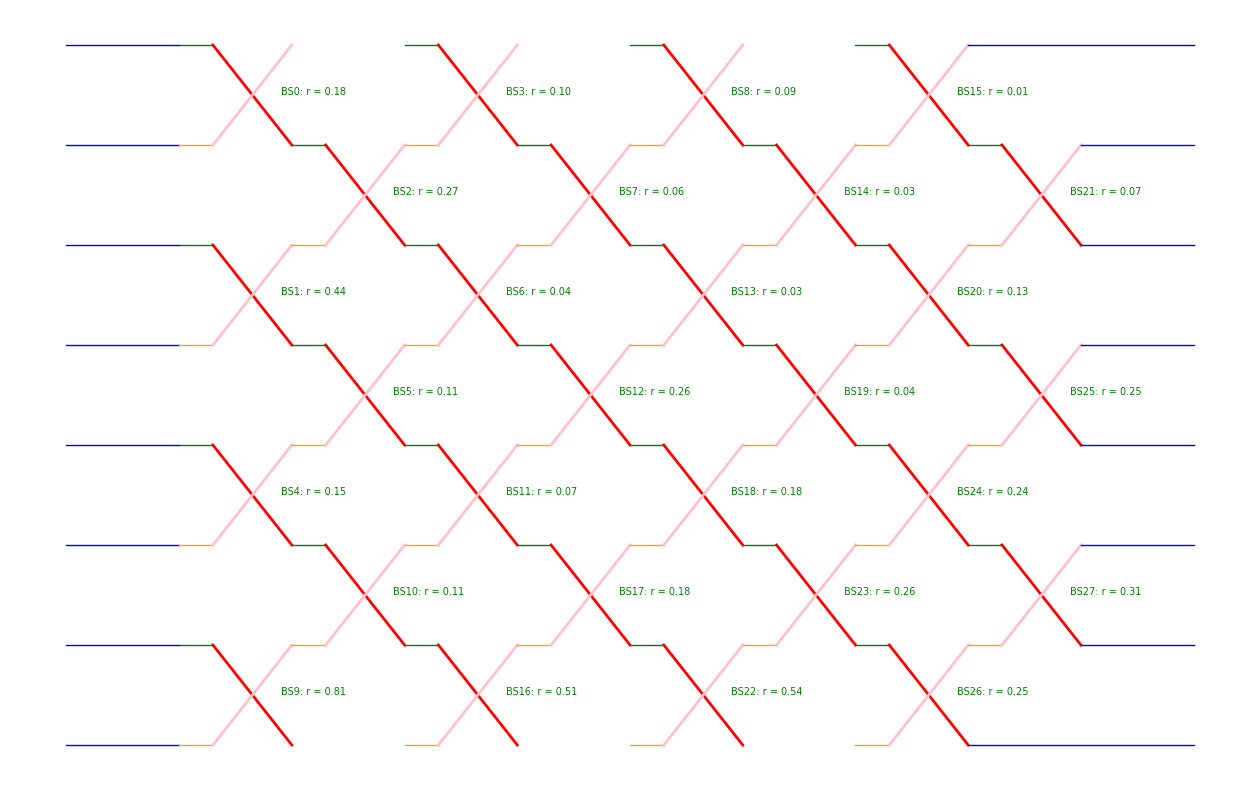

In [4]:
num_modes = 8  # N must be more than 2
U = random_unitary(num_modes)
itf = square_decomposition(U)
itf.draw()
to_print = 0

if to_print:

    for i, bs in enumerate(itf.BS_list):
        print(bs)
        print(f" BS{i}")

WindowsPath('data/layout/mesh8x8.gds')

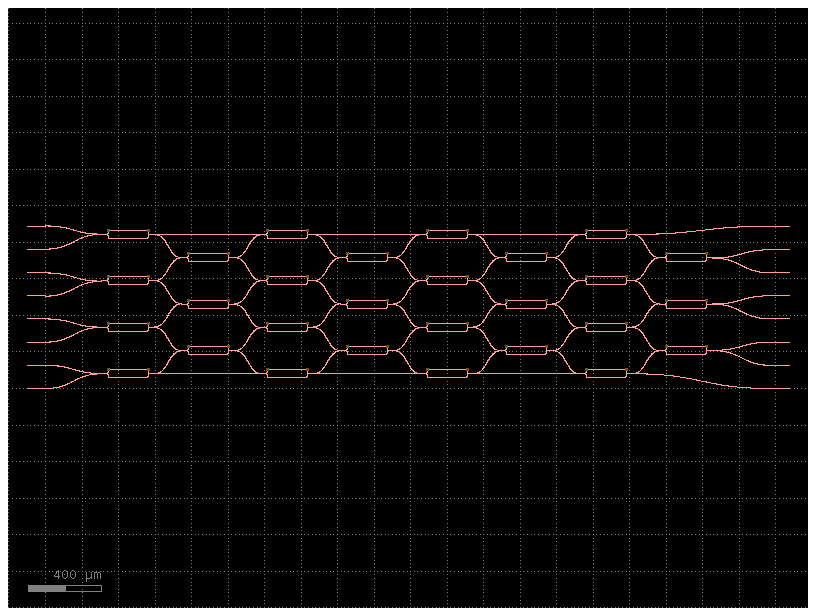

In [5]:
from create_gds_nxn import create_mesh_interferometer
import os

mesh = create_mesh_interferometer(
    N=num_modes,
    tunable_BS=tunable_BS,
    coupler_array=coupler_array,
    BS_list=itf.BS_list,
    spacing_x=tunable_BS.size_info.width * 1.5,
    spacing_y=127,
    draw_bbox=False,
)

mesh.plot(show_labels=True)
os.makedirs("./data/layout", exist_ok=True)
mesh.write_gds(f"./data/layout/mesh{num_modes}x{num_modes}.gds")